<br>

<br>

# 💳 **SISTEMA DE DETECCIÓN DE FRAUDE BANCARIO** 💳

**PROYECTO FINAL**

<br>

## **ÍNDICE**

- **PASO 1: DEFINCIÓN DEL PROBLEMA**
- **PASO 2: RECOLECCIÓN DE DATOS**
- **PASO 3: EXPLORACIÓN Y PROCESAMIENTO DE DATOS**
- **PASO 4: DIVISIÓN DEL CONJUNTO DE DATOS E INGENIERÍA DE CARACTERÍSTICAS**
- **PASO 5: CREACIÓN DEL MODELO**
- **PASO 6: ENTRENAMIENTO DEL MODELO**
- **PASO 7: GRÁFICO**
- **PASO 8: EVALUACIÓN DE MODELO**
- **PASO 9: GUARDAR MODELO**

<br>

<br>

<br>

---

<br>

<br>

# **PASO 1: DEFINICIÓN DEL PROBLEMA**


El fraude bancario representa una amenaza significativa para las instituciones financieras, resultando en pérdidas económicas sustanciales y afectando negativamente la confianza de los clientes. La detección temprana y precisa de actividades fraudulentas es esencial para mitigar estos riesgos. El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático que identifique transacciones fraudulentas utilizando el "Bank Account Fraud Dataset Suite (NeurIPS 2022)" disponible en Kaggle. 

Para nuestro cometido debemos seleccionar un dataset que cumpla con los siguientes requisitos:

- Mínimo: 60,000 filas.
- 20 variables predictoras (al menos 1 categórica).


**Descripción del Dataset escogido:**

Los datos pertenecen a un Dataset de la empresa **Feedzai**. 

Feedzai es una empresa portuguesa de ciencia de datos, que se especializa en desarrollar herramientas de aprendizaje automático en tiempo real para identificar transacciones de pago fraudulentas y minimizar riesgos en los sectores de servicios financieros, comercio minorista y comercio electrónico. Su plataforma utiliza inteligencia artificial avanzada para analizar grandes volúmenes de datos y detectar patrones de fraude, como el robo de identidad, fraude con tarjetas de crédito y estafas en línea.

En nuestro caso en particular, el conjunto de datos seleccionado proporciona información tabular sobre transacciones bancarias, incluyendo características relevantes para la identificación de fraudes. Este dataset ha sido diseñado para evaluar modelos de aprendizaje automático en contextos de datos sesgados, desbalanceados y dinámicos. 


<br>

<br>

---

<br>

<br>

# **PASO 2: RECOLECCIÓN DE DATOS**

**IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.exceptions import NotFittedError

# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random


import joblib
import zipfile


<br>

**DESCARGAR EL DATSET DESDE LA API DE KAGGLE**

In [2]:
# Identificador del conjunto de datos de Kaggle
identificador_conjunto_datos = "sgpjesus/bank-account-fraud-dataset-neurips-2022"

try:
    # Descargar el conjunto de datos usando la API de Kaggle
    os.system(f'kaggle datasets download -d {identificador_conjunto_datos}')
    print("Dataset descargado exitosamente.")
except Exception as e:
    print(f"Error al descargar el dataset: {e}")

Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
bank-account-fraud-dataset-neurips-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset descargado exitosamente.


<br>

**EXTRACCIÓN DEL SELECTIVA DEL DATASET "Base.csv"**

In [3]:

# Identificador del conjunto de datos de Kaggle
identificador_conjunto_datos = "sgpjesus/bank-account-fraud-dataset-neurips-2022"

try:
    # Descargar el conjunto de datos usando la API de Kaggle
    os.system(f'kaggle datasets download -d {identificador_conjunto_datos}')
    print("Dataset descargado exitosamente.")

    # Obtener la ruta del archivo zip descargado
    ruta_archivo_zip = f"{identificador_conjunto_datos.split('/')[1]}.zip"  # Ajusta el nombre del archivo zip si es diferente

    # Extraer solo el archivo Base.csv
    with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
        archivo_zip.extract('Base.csv', path='.')  # Extrae Base.csv al directorio actual

    print("Archivo Base.csv extraído exitosamente.")

except Exception as e:
    print(f"Error al procesar el dataset: {e}")

Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
bank-account-fraud-dataset-neurips-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset descargado exitosamente.
Archivo Base.csv extraído exitosamente.


<br>

**LECTURA Y VISUALIZACIÓN DEL DATASET**

In [4]:
df = pd.read_csv("Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


<br>

**VISUALIZACIÓN DE DATOS**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

**DESCRIPCIÓN DE LAS VARIABLES**


1.  **`fraud_bool`**: **VARIABLE OBJETIVO**. Indicador de fraude (1 si es fraude, 0 si no lo es).
2.  **`income`**: Ingreso del cliente. Puede ayudar a identificar patrones de fraude basados en el nivel de ingresos.
3.  **`name_email_similarity`**: Similitud entre el nombre y el correo electrónico del cliente. Un valor alto podría indicar un intento de fraude.
4.  **`prev_address_months_count`**: Meses en la dirección anterior. Cambios frecuentes de dirección pueden ser un indicador de fraude.
5.  **`current_address_months_count`**: Meses en la dirección actual. Similar a la variable anterior.
6.  **`customer_age`**: Edad del cliente. Puede influir en el comportamiento de fraude.
7.  **`days_since_request`**: Días desde la solicitud. Puede indicar urgencia sospechosa.
8.  **`intended_balcon_amount`**: Monto del saldo previsto. Puede ayudar a identificar transacciones inusuales.
9.  **`payment_type`**: Tipo de pago (por ejemplo, tarjeta de crédito, débito). Algunos tipos de pago pueden ser más susceptibles a fraude.
10. **`zip_count_4w`**: Número de códigos postales utilizados en las últimas 4 semanas. Un alto número puede indicar actividad sospechosa.
11. **`velocity_6h`**: Número de transacciones en las últimas 6 horas. Alta frecuencia puede ser un indicador de fraude.
12. **`velocity_24h`**: Número de transacciones en las últimas 24 horas. Similar a la variable anterior.
13. **`velocity_4w`**: Número de transacciones en las últimas 4 semanas. Ayuda a identificar patrones de comportamiento.
14. **`bank_branch_count_8w`**: Número de sucursales bancarias utilizadas en las últimas 8 semanas. Alta variabilidad puede ser sospechosa.
15. **`date_of_birth_distinct_emails_4w`**: Número de correos electrónicos distintos asociados a la fecha de nacimiento en las últimas 4 semanas. Puede indicar intentos de fraude.
16. **`employment_status`**: Estado laboral del cliente. Puede influir en el comportamiento financiero.
17. **`credit_risk_score`**: Puntuación de riesgo crediticio. Indicador importante para evaluar el riesgo de fraude.
18. **`email_is_free`**: Indicador de si el correo electrónico es de un proveedor gratuito. Los correos gratuitos pueden ser más susceptibles a fraude.
19. **`housing_status`**: Estado de vivienda del cliente (por ejemplo, propietario, inquilino). Puede influir en el comportamiento financiero.
20. **`phone_home_valid`**: Indicador de si el teléfono fijo es válido. Teléfonos no válidos pueden ser sospechosos.
21. **`phone_mobile_valid`**: Indicador de si el teléfono móvil es válido. Similar a la variable anterior.
22. **`bank_months_count`**: Meses con la cuenta bancaria. Cuentas nuevas pueden ser más susceptibles a fraude.
23. **`has_other_cards`**: Indicador de si el cliente tiene otras tarjetas. Puede influir en el comportamiento financiero.
24. **`proposed_credit_limit`**: Límite de crédito propuesto. Puede ayudar a identificar transacciones inusuales.
25. **`foreign_request`**: Indicador de si la solicitud es extranjera. Solicitudes extranjeras pueden ser más susceptibles a fraude.
26. **`source`**: Fuente de la solicitud (por ejemplo, web, móvil). Algunas fuentes pueden ser más susceptibles a fraude.
27. **`session_length_in_minutes`**: Duración de la sesión en minutos. Sesiones largas o cortas pueden ser sospechosas.
28. **`device_os`**: Sistema operativo del dispositivo. Algunos sistemas operativos pueden ser más susceptibles a fraude.
29. **`keep_alive_session`**: Indicador de si la sesión se mantiene activa. Sesiones mantenidas activas pueden ser sospechosas.
30. **`device_distinct_emails_8w`**: Número de correos electrónicos distintos asociados al dispositivo en las últimas 8 semanas. Puede indicar intentos de fraude.
31. **`device_fraud_count`**: Número de fraudes asociados al dispositivo. Indicador directo de riesgo.
32. **`month`**: Mes de la transacción. Puede ayudar a identificar patrones estacionales de fraude.

<br>

**VALORES DISTINTOS POR COLUMNA**

In [6]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

<br>

**RESUMEN ESTADÍSTICO DEL DATAFRAME**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


<br>

**DIMENSIONES DEL DATAFRAME**

In [8]:
print(" ")
print(f"EL DATAFRAME ORIGINAL TIENE UNA MATRIZ DE:", df.shape)

 
EL DATAFRAME ORIGINAL TIENE UNA MATRIZ DE: (1000000, 32)


<br>

**NÚMERO DE FILAS DUPLICADAS**

In [9]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(numeros_duplicados)

0


**REDUCCIÓN DE DATOS**

- El objetivo de este paso es reducir el tamaño del Dataset para optimizar el espacio del repositorio. 
- Pasamos de 1'000.000 de filas a 100.000
- Se ha priorizado la eliminazión de filas **`"NO FRAUDE"`**, dado que lo más importante es que el modelo aprenda lo que es un **`"FRAUDE"`**



In [10]:
# Cargar el dataset
df1 = pd.read_csv('Base.csv')

# Filtrar las filas donde fraud_bool es 0
zero_fraud_df = df[df['fraud_bool'] == 0]

# Contar cuántas filas tienen fraud_bool igual a 0
num_zero_fraud = len(zero_fraud_df)

if num_zero_fraud <= 900000:
    # Si hay menos o igual a 900,000 filas, eliminamos todas
    df = df[df['fraud_bool'] != 0]
else:
    # Si hay más de 900,000 filas, eliminamos una muestra de 900,000 filas
    zero_fraud_sample = zero_fraud_df.sample(n=900000, replace=False)
    df = df.drop(zero_fraud_sample.index)

# Guardar el dataframe resultante en un nuevo archivo CSV
df.to_csv('Base_100milfilas.csv', index=False)

print(f"{min(num_zero_fraud, 900000)} filas con fraud_bool 0 han sido eliminadas y guardadas en 'Base_100milfilas.csv'.")

900000 filas con fraud_bool 0 han sido eliminadas y guardadas en 'Base_100milfilas.csv'.


<br>

**VISUALIZACIÓN DEL DATASET CON REDUCCIÓN DE DATOS**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 5 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  float6

La reducción se ha llevado a cabo de la siguiente manera:

- Se ha cargado el dataset original.

- Se ha identificado el total de registros donde **`fraud_bool`** es **`0`**.

- Si el total de registros con **`fraud_bool`** = 0 es menor o igual a **900,000**, se eliminan todos estos registros.

- Si hay más de **900,000** registros con **`fraud_bool`** = **0**, se toma una muestra aleatoria de **900,000 registros y se eliminan**.

- Finalmente, el dataset reducido se guarda en un nuevo archivo llamado **`Base_100milfilas.csv`**

**VISUALIZACIÓN DE LA COLUMNA `FRAUDE`**

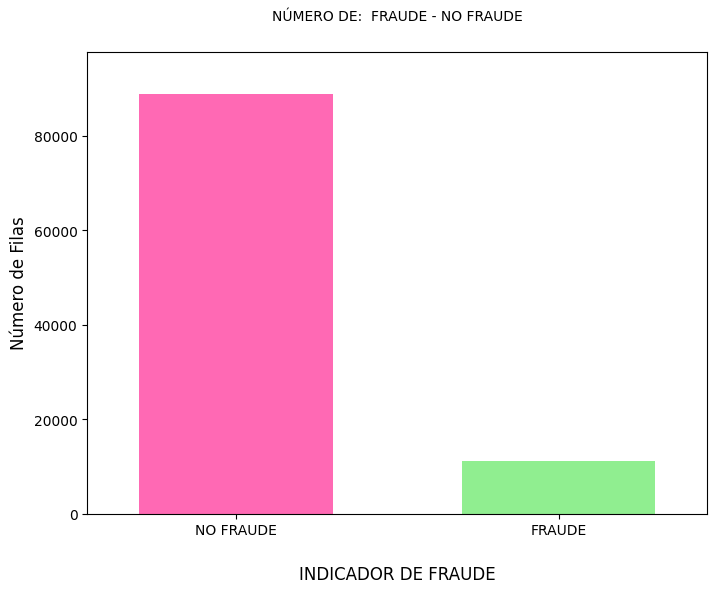

In [12]:
# Cargar el dataset
df = pd.read_csv('Base_100milfilas.csv')

# Contar el número de filas con 0 y 1 en la columna fraud_bool
fraud_bool_counts = df['fraud_bool'].value_counts()

# Definir la paleta de colores 
neon_colors = ['#FF69B4', '#90EE90'] 

# Crear el gráfico de barras con espacio
plt.figure(figsize=(8, 6))  # Ajusta el tamaño si es necesario
plt.bar(fraud_bool_counts.index, fraud_bool_counts.values, color=neon_colors, width=0.6)  # Ajusta el ancho de las barras
plt.xlabel('INDICADOR DE FRAUDE', fontsize=12, labelpad=20)  # Ajusta el espacio con labelpad
plt.ylabel('Número de Filas', fontsize=12)
plt.title('NÚMERO DE:  FRAUDE - NO FRAUDE', fontsize=10, y=1.05)  # Ajusta la posición del título
plt.xticks([0, 1], ['NO FRAUDE', 'FRAUDE'], fontsize=10)

# Añadir espacio entre las barras y el eje x
plt.margins(0.1, 0.1)

plt.show()

<br>

<br>

---

<br>

<br>

# **PASO 3: EXPLORACIÓN Y PROCESAMIENTO DE DATOS**

<br>

**NÚMERO DE FILAS DUPLICADAS**

(NUEVO DATASET)

In [13]:
duplicados = df.duplicated()
numero_de_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS DEL DATASET SON: {numero_de_duplicados}")

LOS NUMEROS DUPLICADOS DEL DATASET SON: 0


<br>

**CONTEO DE VALORES NULOS (NaN) POR COLUMNA**

In [14]:
# Se realiza un conteo de los valores 'NaN' por columna para identificar dónde se requiere reemplazo
nan_counts = df.isna().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

CONTEO DE LOS 'NaN' POR COLUMNAS:


fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

<br>

**IDENTIFICACIÓN DE VALORES FALTANTES**

In [15]:
Valores_faltantes = df.isnull().sum() 
print("Valores faltantes por columna:\n", Valores_faltantes)

Valores faltantes por columna:
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source            

# #

<br>

**DISTRIBUCIÓN DE VARIABLES NUMÉRICAS MEDIANTE HISTOGRAMAS**

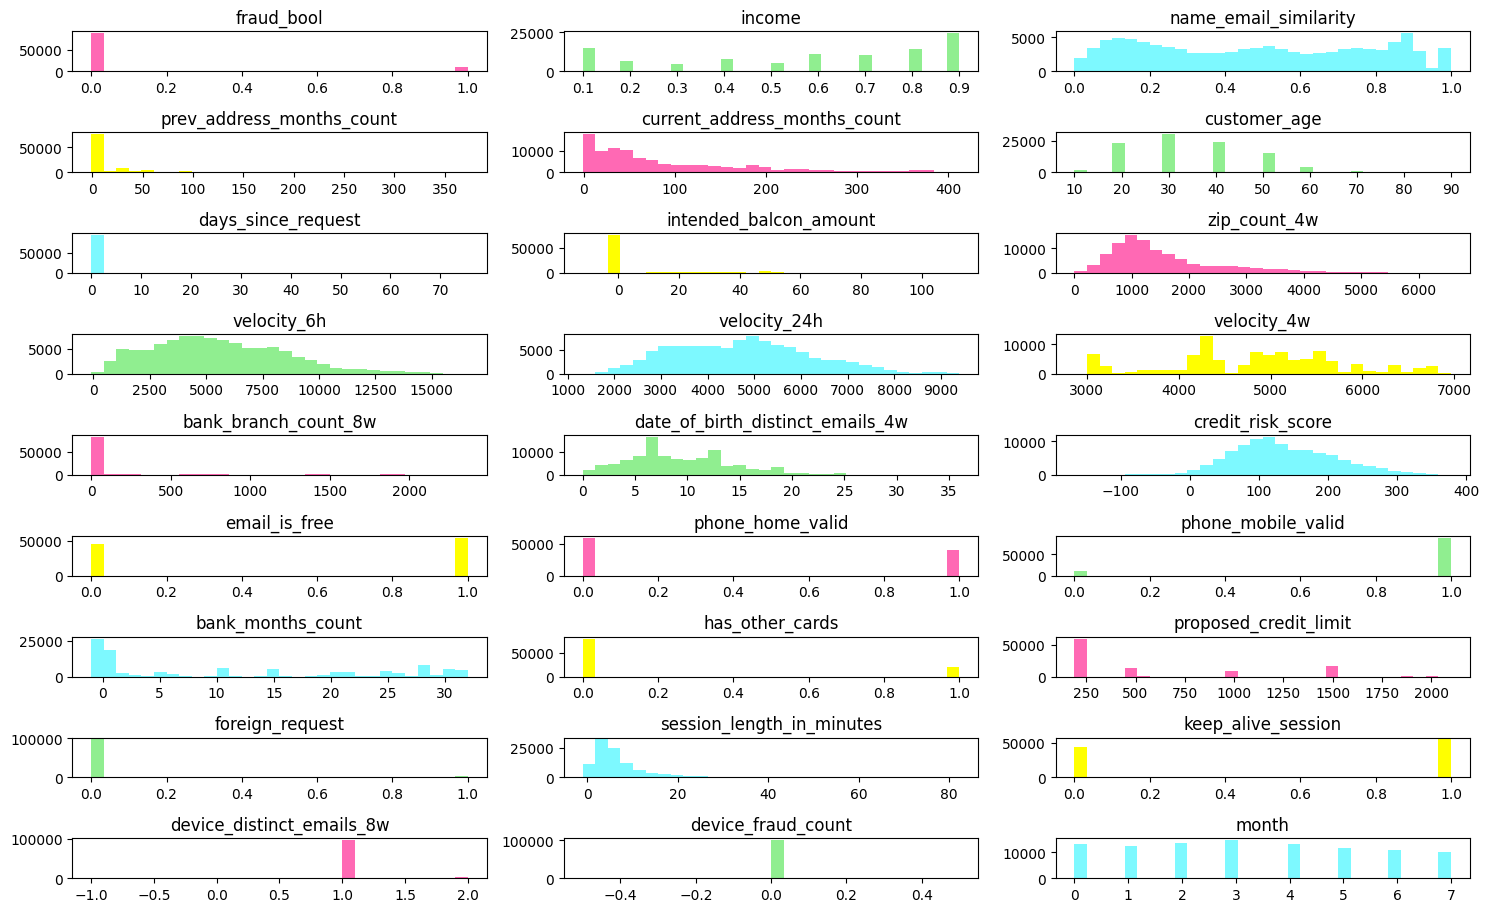

In [16]:
# Seleccionar todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Ajustar el tamaño de la figura para que se ajuste a la pantalla de salida
plt.figure(figsize=(15, 10))

# Definir la paleta de colores neon
pastel_colors = ['#FF69B4', '#90EE90', '#7DF9FF', '#FFFF00']  # Ejemplo de paleta

# Crear los histogramas con neon
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i+1) # Crea los subplots
    plt.hist(df[col], bins=30, color=pastel_colors[i % len(pastel_colors)]) # Asigna colores de la paleta
    plt.title(col) # Añade título a cada subplot

plt.tight_layout()
plt.show()

<br>

**MATRIX DE CORRELACIÓN DE VARIABLES NUMÉRICO-NUMÉRICO**

Una **matriz de correlación** es una tabla que muestra los coeficientes de correlación entre múltiples variables. Cada celda de la tabla representa la correlación entre dos variables específicas, lo que permite visualizar de manera rápida y eficiente las relaciones entre todas las variables.

**¿Cómo funciona?**

1. **Recopilación de datos:** Se obtienen los datos de las variables que se desean analizar. Estos datos deben ser numéricos y representar mediciones o conteos.
2. **Cálculo de coeficientes de correlación:** Se calcula el coeficiente de correlación entre cada par de variables. El coeficiente de correlación más común es el de **Pearson**, que mide la relación lineal entre dos variables. Otros coeficientes, como el de **Spearman** o **Kendall**, se utilizan para variables ordinales o no lineales.
3. **Construcción de la matriz:** Los coeficientes de correlación se organizan en una tabla, donde las filas y columnas representan las variables. La celda en la intersección de una fila y una columna muestra el coeficiente de correlación entre esas dos variables.

**¿Para qué sirve?**

1. **Identificación de relaciones:** Permite identificar rápidamente qué variables están relacionadas entre sí y la fuerza de estas relaciones. Un coeficiente de correlación cercano a 1 indica una relación positiva fuerte, cercano a -1 indica una relación negativa fuerte, y cercano a 0 indica una relación débil o nula.
2. **Análisis de patrones:** Facilita la identificación de patrones y tendencias en los datos. Por ejemplo, se pueden identificar grupos de variables que están altamente correlacionadas entre sí, lo que sugiere que podrían estar influenciadas por un factor común.
3. **Reducción de dimensionalidad:** En conjuntos de datos con muchas variables, la matriz de correlación puede ayudar a identificar las variables más relevantes y reducir la cantidad de información necesaria para el análisis.
4. **Selección de variables:** Al identificar variables altamente correlacionadas, se puede seleccionar un subconjunto de variables para su estudio, evitando la redundancia y simplificando el análisis.
5. **Validación de modelos:** La matriz de correlación puede utilizarse para validar modelos estadísticos, asegurando que las relaciones entre las variables sean consistentes con las esperadas teóricamente.

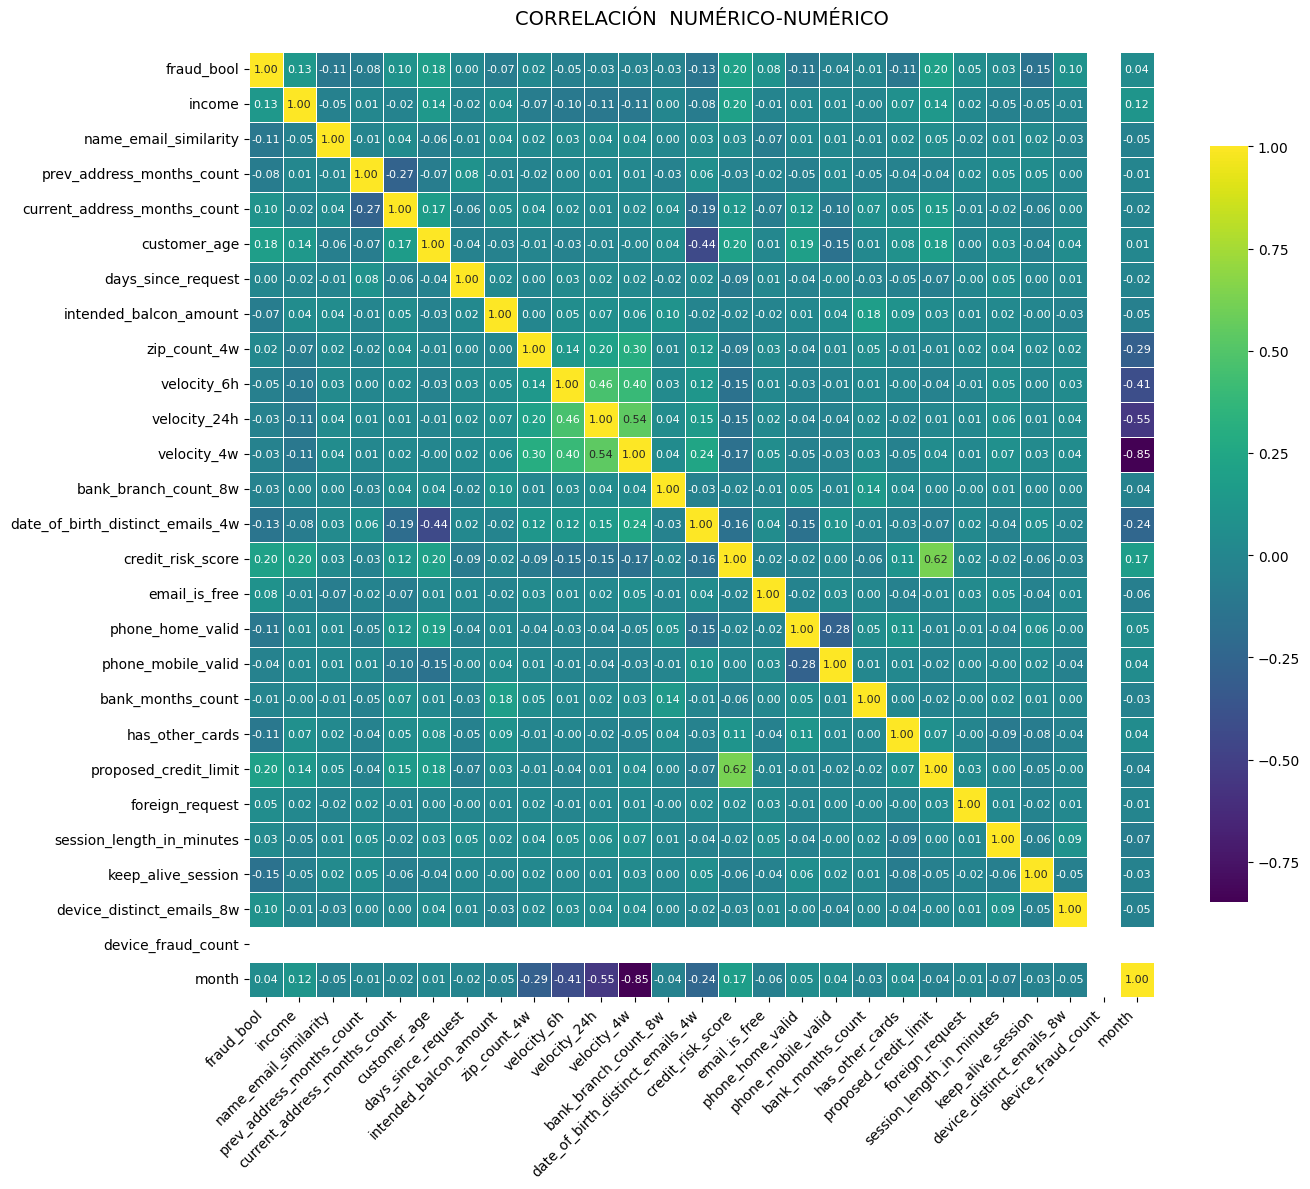

In [17]:

plt.figure(figsize=(14, 12))

corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='viridis', 
            fmt=".2f",  # Limita los valores a 2 decimales
            linewidths=0.5,  # Añade líneas finas para separar los valores
            annot_kws={"size": 8},  # Reduce el tamaño del texto
            cbar_kws={'shrink': 0.8}  # Ajusta el tamaño de la barra de color
           )

# Mejorar la legibilidad de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Título con mejor separación
plt.title("CORRELACIÓN  NUMÉRICO-NUMÉRICO", fontsize=14, pad=20)

plt.tight_layout()

plt.show()


<br>

**GRÁFICOS BOXPLOT PARA DETECTAR OUTLIERS**

El análisis de valores atípicos (outliers) es un paso fundamental en la preparación de datos para modelos de Machine Learning, especialmente en problemas de detección de fraudes. 

Para identificar estos valores atípicos, se han generado diagramas de caja (boxplots) para cada una de las variables numéricas en el conjunto de datos, con el objetivo de evaluar la dispersión y distribución de los datos en relación con la variable objetivo **`fraud_bool`**.

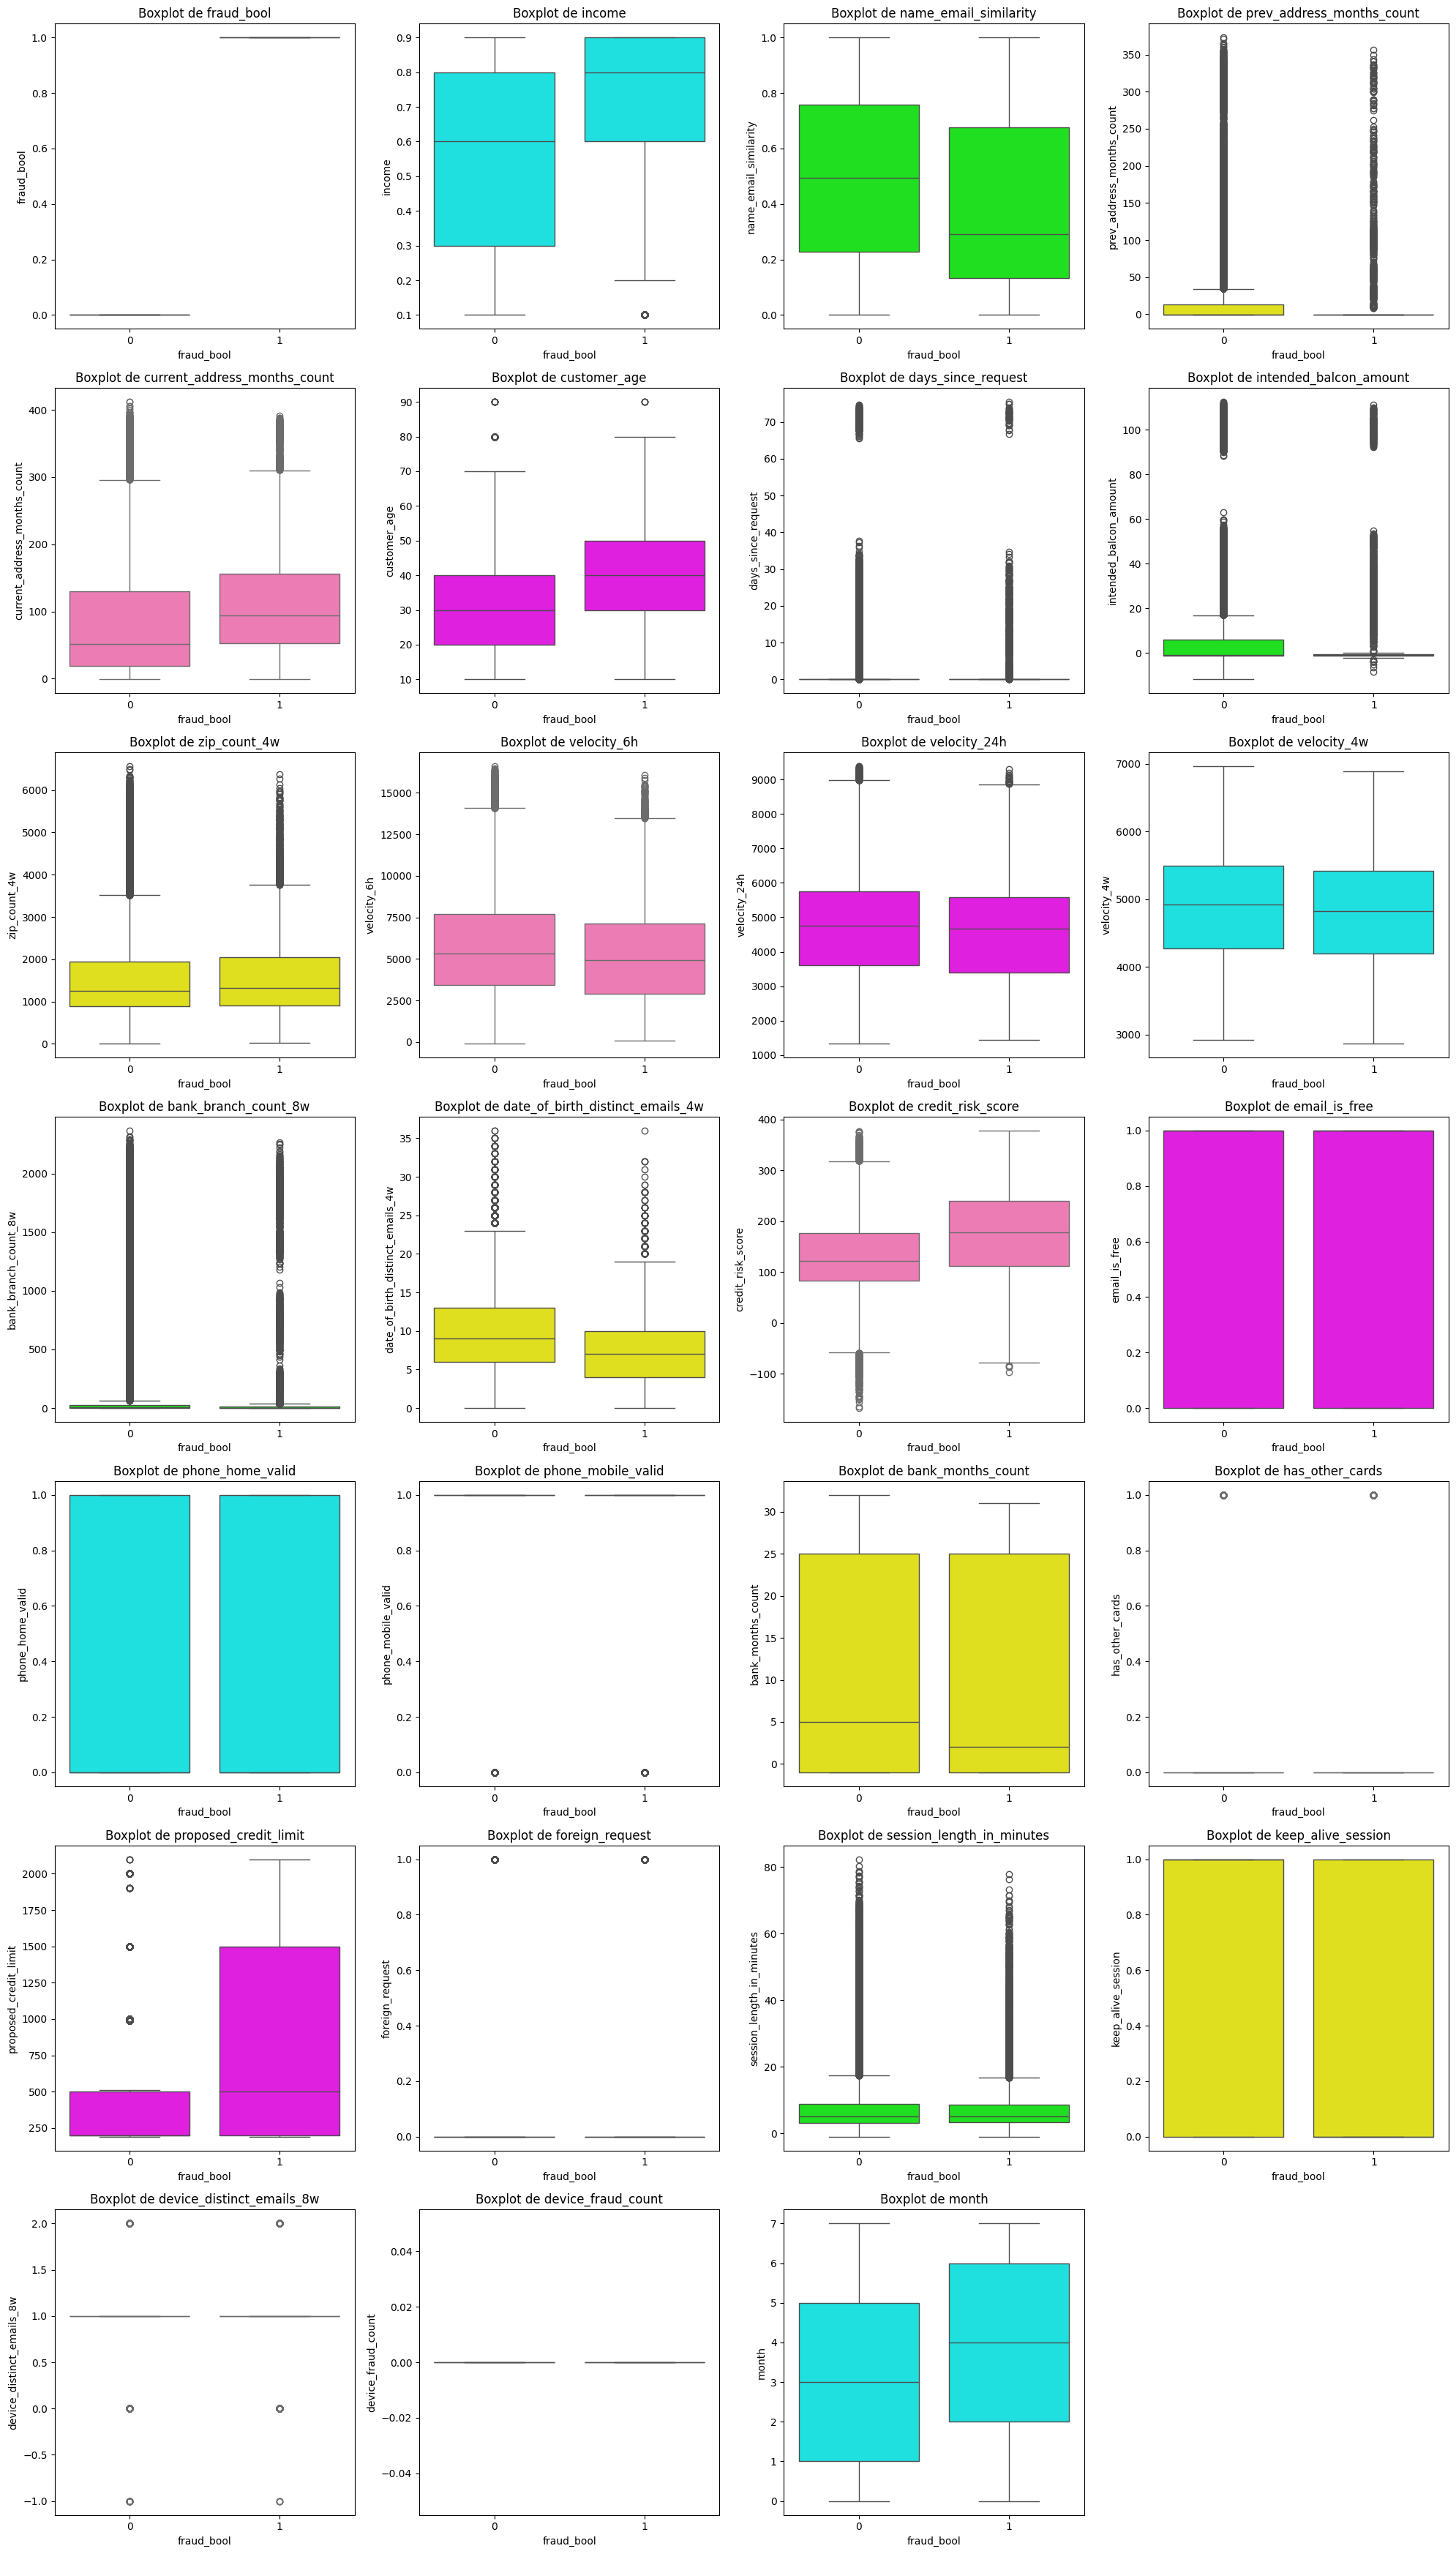

In [18]:
# Seleccionar todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular el número de filas necesarias
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Paleta de colores neón
neon_palette = ['#FF00FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF69B4']  # Ejemplo de paleta neón

# Crear subplots dinámicos
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

# Grafico boxplots para cada variable con colores neón
for i, var in enumerate(numeric_cols):
    row = i // n_cols
    col = i % n_cols
    
    # Utilizar un color de la paleta neón para cada boxplot
    box_color = neon_palette[i % len(neon_palette)]  # Rotar por la paleta si es necesario
    
    # Crear el boxplot con el color especificado
    sns.boxplot(x='fraud_bool', y=var, data=df, ax=axes[row, col], color=box_color)
    
    axes[row, col].set_title(f'Boxplot de {var}')

# Eliminar subplots vacíos
for j in range(len(numeric_cols), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

<br>

<br>

---

<br>

<br>

# **PASO 4: DIVISIÓN DEL CONJUNTO DE DATOS E INGENIERÍA DE CARACTERÍSTICAS**

<br>

**DIVISIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA**

El conjunto de datos **`(df)`** se divide en dos subconjuntos:

- **CONJUNTO DE ENTRENAMIENTO `(X_train, y_train)`**: Se utiliza para entrenar el modelo de aprendizaje automático.
- **CONJUNTO DE PRUEBA `(X_test, y_test)`**: Se utiliza para evaluar el rendimiento del modelo en datos no vistos.

In [19]:
# Se divide el conjunto de datos en muestras de train y test
X = df.drop("fraud_bool", axis = 1)
y = df["fraud_bool"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.7,0.645840,-1,130,30,0.020900,-1.066823,AB,1042,8040.667608,...,0,1000.0,0,INTERNET,58.203975,linux,0,2,0,5
48955,0.8,0.814889,233,30,40,0.010183,-1.204704,AB,1097,9775.455719,...,1,200.0,0,INTERNET,5.308421,other,0,1,0,3
44966,0.4,0.723072,-1,37,30,0.020087,32.473813,AA,1987,3541.133930,...,0,500.0,0,INTERNET,2.064154,other,1,1,0,3
13568,0.2,0.585067,30,3,20,8.558656,20.848410,AA,1651,4094.465616,...,0,200.0,0,INTERNET,2.556427,linux,1,1,0,1
92727,0.9,0.672867,-1,190,50,0.022912,22.672241,AA,1446,1137.837425,...,1,500.0,0,INTERNET,7.856601,other,0,1,0,7


- La división se ha realizado utilizando la función **`train_test_split`** de la biblioteca **scikit-learn**. 
- Se especifica un tamaño de prueba del **20%** (**`test_size = 0.2`**) y un estado aleatorio (**`random_state = 42`**) para garantizar la reproducibilidad de los resultados.

- **INGENIERÍA DE CARACTERÍSTICAS**:

- **La variable OBJETIVO (y)** es la columna "**`fraud_bool`**", que indica si una transacción es fraudulenta o no.
- **Las características PREDICTORAS `(X)`** son el resto de las columnas del conjunto de datos original.

<br>

<br>

**ESCALADO DE VARIABLES NUMÉRICAS CON `StandardScaler`**

- Identificamos y escalamos las variables numéricas, excluyendo la "VARIABLE OBJETIVO": **`fraud_bool`**

In [ ]:
# Identificación de las variables numéricas automáticamente, excluyendo 'fraud_bool' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'fraud_bool']

# Es instanciado el escalador
scaler = StandardScaler()

# Se ajusta el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Se ajusta el escalador con los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Se aplica el escalador con los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Se muestra las primeras filas de los datos escalados de entrenamiento

X_train_final.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.426101,0.554425,-0.384409,0.456045,-0.361667,-0.185388,-0.465186,-0.529381,0.807897,-0.096106,...,0.359923,1.663965,-0.513365,0.881868,-0.169296,6.177075,-1.109571,4.812456,0.0,0.756981
48955,0.770931,1.133462,5.026307,-0.673222,0.448541,-0.187394,-0.472119,-0.474673,1.385922,1.733643,...,0.359923,-0.797353,1.947932,-0.675156,-0.169296,-0.280030,-1.109571,-0.121056,0.0,-0.142420
44966,-0.608387,0.818964,-0.384409,-0.594173,-0.361667,-0.185540,1.221366,0.410611,-0.691332,-0.830523,...,0.359923,1.253745,-0.513365,-0.091272,-0.169296,-0.676067,0.901250,-0.121056,0.0,-0.142420
13568,-1.298045,0.346259,0.332396,-0.978124,-1.171875,1.412517,0.636796,0.076391,-0.506964,-0.255957,...,0.359923,1.253745,-0.513365,-0.675156,-0.169296,-0.615974,0.901250,-0.121056,0.0,-1.041821
92727,1.115760,0.647000,-0.384409,1.133605,1.258749,-0.185011,0.728505,-0.127522,-1.492102,-1.333009,...,0.359923,-0.469178,1.947932,-0.091272,-0.169296,0.031033,-1.109571,-0.121056,0.0,1.656382


<br>

**IDENTIFICACIÓN DE VARIABLES CATEGÓRICAS EN TODO EL DATASET**

In [21]:
# Identificamos variables categóricas automáticamente, como en este no hay, aparecen en cero.
columnas_categoricas = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Variables categóricas:")
print(columnas_categoricas)

Variables categóricas:
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


<br>

**SELECCIÓN DE LAS MEJORES CARÁCTERÍSTICAS DEL DATASET**


- Este código realiza una selección de las 20 mejores características (variables) de un conjunto de datos de entrenamiento (`X_train_final`) para un problema de clasificación.  
- Utiliza la función `f_classif` (ANOVA unidireccional) para evaluar la importancia de cada característica y `SelectKBest` para seleccionar las 20 mejores. 
- Luego, aplica esta selección tanto al conjunto de entrenamiento como al de prueba (`X_test_final`), creando nuevos DataFrames (`X_train_sel` y `X_test_sel`) que contienen solo las características seleccionadas.
- Finalmente, se muestra `X_train_sel`.

In [22]:
# Con un valor de k = 20
selection_model = SelectKBest(score_func=f_classif, k = 20)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,month
0,0.426101,0.554425,-0.384409,0.456045,-0.361667,-0.465186,0.807897,-0.499146,1.258199,-0.648657,0.404004,0.919457,-0.819626,0.359923,-0.513365,0.881868,-0.169296,-1.109571,4.812456,0.756981
1,0.770931,1.133462,5.026307,-0.673222,0.448541,-0.472119,1.385922,2.092881,-0.356146,0.544559,-0.369498,0.919457,-0.819626,0.359923,1.947932,-0.675156,-0.169296,-1.109571,-0.121056,-0.142420
2,-0.608387,0.818964,-0.384409,-0.594173,-0.361667,1.221366,-0.691332,0.386872,-0.389182,0.544559,0.376379,0.919457,-0.819626,0.359923,-0.513365,-0.091272,-0.169296,0.901250,-0.121056,-0.142420
3,-1.298045,0.346259,0.332396,-0.978124,-1.171875,0.636796,-0.506964,0.939652,-0.380372,0.544559,-1.681690,-1.087598,-0.819626,0.359923,-0.513365,-0.675156,-0.169296,0.901250,-0.121056,-1.041821
4,1.115760,0.647000,-0.384409,1.133605,1.258749,0.728505,-1.492102,0.606132,2.531176,-1.245265,0.445441,-1.087598,1.220069,0.359923,1.947932,-0.091272,-0.169296,-1.109571,-0.121056,1.656382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1.115760,-1.554946,0.748605,-0.932953,-1.171875,-0.487279,0.707012,1.142867,-0.314301,1.936645,-0.880562,0.919457,1.220069,0.359923,-0.513365,-0.675156,-0.169296,-1.109571,-0.121056,-1.491522
79996,1.115760,0.568002,-0.384409,-0.481247,1.258749,0.633650,0.799110,-0.512887,-0.371563,-0.847527,-0.659562,-1.087598,-0.819626,0.359923,-0.513365,-0.675156,-0.169296,-1.109571,-0.121056,0.307280
79997,0.770931,1.433734,-0.384409,-0.673222,0.448541,0.755271,0.197069,-0.540102,-0.382575,-0.648657,0.169190,-1.087598,1.220069,0.359923,1.947932,-0.675156,-0.169296,-1.109571,-0.121056,0.756981
79998,0.081272,-0.724445,-0.106936,-0.944246,-0.361667,-0.492687,2.045131,-1.187237,-0.391384,-0.847527,-0.645749,-1.087598,1.220069,-2.778371,-0.513365,-0.675156,-0.169296,0.901250,-0.121056,-1.491522


<br>

**OBTENCIÓN DE LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERÍSTICAS**

- Este código toma los resultados de un modelo de selección de características (`selection_model`), específicamente las puntuaciones de importancia y las características seleccionadas, y los organiza en un DataFrame para su mejor visualización.

In [23]:
print("OBTENCIÓN DE LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS:")

# Obtengo las puntuaciones y las características seleccionadas 
scores = selection_model.scores_ 
selected_indices = selection_model.get_support(indices=True) 
selected_features = X.columns[selected_indices] 

# Creo un DataFrame con las características y sus puntuaciones 
scores_df = pd.DataFrame({'Características': selected_features, 'Puntuaciones': scores[selected_indices]}) 
scores_df = scores_df.sort_values(by='Puntuaciones', ascending=False) 

# Muestro las 20 mejores características con sus puntuaciones 

scores_df

OBTENCIÓN DE LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS:


,Características,Puntuaciones
10,date_of_birth_distinct_emails_4w,3484.574128
15,phone_mobile_valid,3252.777425
4,customer_age,2789.905013
17,proposed_credit_limit,1894.764960
0,income,1491.285365
9,bank_branch_count_8w,1339.393118
1,name_email_similarity,1011.037213
14,phone_home_valid,949.264626
12,credit_risk_score,929.339090
3,current_address_months_count,755.987143


<br>

# **PASO 5: CREACIÓN DEL MODELO**

<br>

**CONFIGURACIÓN DEL MODELO `ÁRBOL DE DECISIÓN` CON SEMILLA ALEATORIA**

In [24]:
model1 = DecisionTreeClassifier(random_state = 42)

<br>

# **PASO 6: ENTRENAMIENTO DEL MODELO**

- Entrenamiento del "MODELO DE ARBOL DE DECISIÓN"

In [25]:
model1.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

<br>

# **PASO 7: GRÁFICO DEL ÁRBOL**

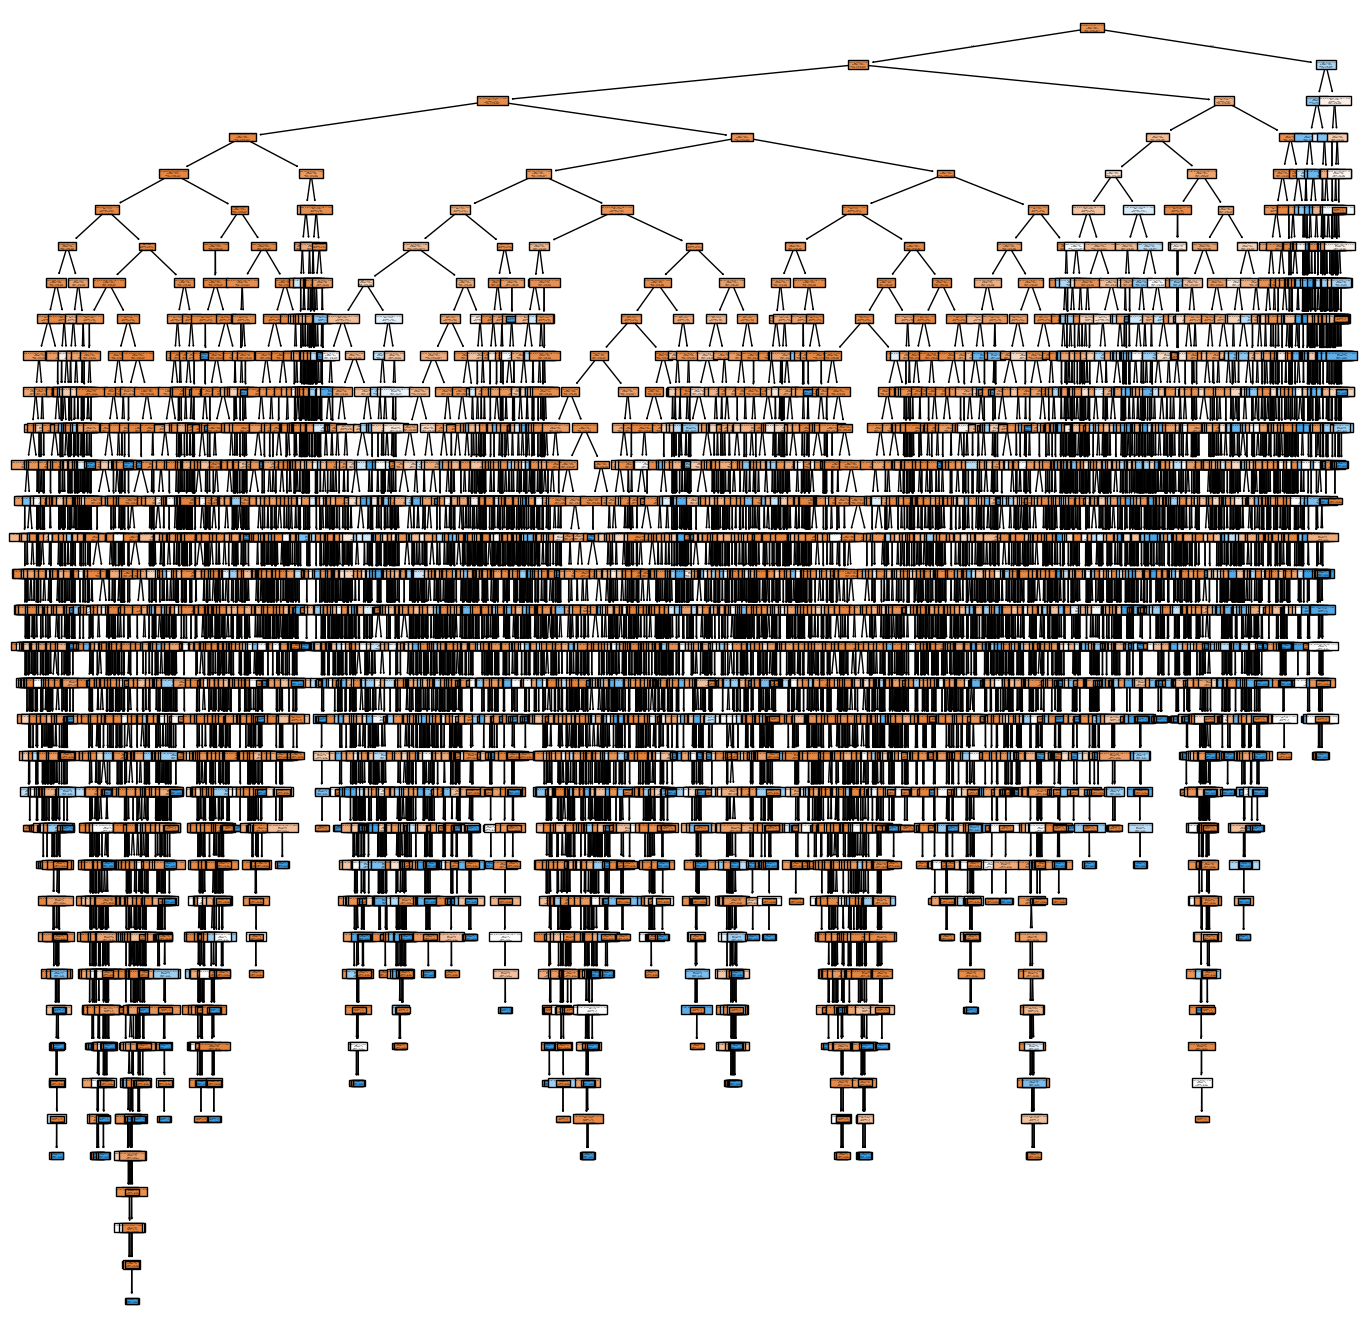

In [26]:
ig = plt.figure(figsize=(17,17))

tree.plot_tree(model1, feature_names = list(X_train_sel.columns), class_names = ["No Fraude", "Fraude"], filled = True)

plt.show()

# **PASO 8: EVALUACIÓN DE MODELO**

<br>

**EJECUTAMOS LA PREDICCIÓN DEL TEST DEL MODELO ORIGINAL**

In [27]:
print("--------------PREDICCIÓNN DEL TEST DEL MODELO ORIGINAL------------")
# predigo el test
y_pred_test = model1.predict(X_test_sel)
y_pred_test

--------------PREDICCIÓNN DEL TEST DEL MODELO ORIGINAL------------


array([1, 0, 1, ..., 0, 0, 1])

<br>

**EJECUTAMOS LA PREDICCIÓN DEL TRAIN DEL MODELO ORIGINAL** 

In [28]:
# predicción del train
y_pred_train = model1.predict(X_train_sel)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

<br>

**MEDICIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA**

In [29]:
print("----------MEDICIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA-------------")

# metricas el modelo inicial sin ajustes
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test Arbol inicial: ", accuracy_test)
print("F1 score Test Arbol inicial: ", f1_score_test)
print("Precision Test Arbol inicial: ", precision_test)
print("Recall Test Arbol inicial: ", recall_test)

print("Accuracy Train Arbol inicial: ", accuracy_train)
print("F1 score Train Arbol inicial: ", f1_score_train)
print("Precision Train Arbol inicial: ", precision_train)
print("Recall Train Arbol inicial: ", recall_train)

----------MEDICIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA-------------
Accuracy Test Arbol inicial:  0.84515
F1 score Test Arbol inicial:  0.84515
Precision Test Arbol inicial:  0.84515
Recall Test Arbol inicial:  0.84515
Accuracy Train Arbol inicial:  1.0
F1 score Train Arbol inicial:  1.0
Precision Train Arbol inicial:  1.0
Recall Train Arbol inicial:  1.0


<br>

**COMPARACIÓN DE LAS METRICAS DE PRUEBA**

In [30]:
print("----------COMPARACIÓN DE LAS MÉTRICAS DE PRUEBA-------------")
print(classification_report(y_test, y_pred_test, target_names=["No Fraude", "Fraude"]))

----------COMPARACIÓN DE LAS MÉTRICAS DE PRUEBA-------------
              precision    recall  f1-score   support

   No Fraude       0.91      0.91      0.91     17744
      Fraude       0.32      0.33      0.32      2256

    accuracy                           0.85     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.85      0.85      0.85     20000



<br>

**COMPARACIÓN DE LAS MÉTRICAS DEL ENTRENAMIENTO**

In [31]:
print("----------COMPARACIÓN DE LAS METRICAS DEL ENTRENAMIENTO-------------")
print(classification_report(y_train, y_pred_train, target_names=["No Fraude", "Fraude"]))

----------COMPARACIÓN DE LAS METRICAS DEL ENTRENAMIENTO-------------
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     71227
      Fraude       1.00      1.00      1.00      8773

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000




# **PASO 9: GUARDAR MODELO**

In [32]:
# Definir la ruta donde se guardará el modelo dentro de "src/models/"
ruta_modelo = 'src/models/modelo_Arbol_inicial.pkl'

# Verificar si el directorio "src/models/" existe, si no, crearlo
directorio = os.path.dirname(ruta_modelo)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)  # 'exist_ok=True' evita errores si el directorio ya existe

# Guardar el modelo
joblib.dump(model1, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: src/models/modelo_Arbol_inicial.pkl
